## Importing libraries

In [80]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

## Khảo sát dữ liệu

In [72]:
df = pd.read_csv('raw_sales.csv')
#Trả về (n) hàng đầu tiên cho các đối tượng trong bộ dữ liệu. Quickly testing data
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().any()

datesold        False
postcode        False
price           False
propertyType    False
bedrooms        False
dtype: bool

In [73]:
#Chuyển đổi kiểu dữ liệu của datesold thành kiểu datetime
df['datesold'] = pd.to_datetime(df['datesold'])
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [6]:
# Tính khoảng thời gian đầu - cuối của bộ dữ liệu
print("Time period from {} to {}".format(df.datesold.min(), df.datesold.max()))

Time period from 2007-02-07 00:00:00 to 2019-07-27 00:00:00


## Descriptive analytics (Phân tích mô tả)

### Chuẩn bị dữ liệu

In [74]:
# Lấy year từ datesold và chia dữ liệu thành 3 vùng chính dựa vào postcode: Region 1 (2599 - 2700), Region 2 (2701 - 2800), Region 3 (2801 - 2915)
df['year'] = df['datesold'].dt.year
for d in [df]:
  d.loc[(df['postcode'] > 2599) & (df['postcode'] <= 2700), 'region'] = 1;
  d.loc[(df['postcode'] > 2701) & (df['postcode'] <= 2800), 'region'] = 2;
  d.loc[(df['postcode'] > 2801) & (df['postcode'] <= 2915), 'region'] = 3;
df['region'] = df['region'].astype(int)
df.head()
# Bộ dữ liệu không có dữ liệu bán bất động sản ở vùng 2

,datesold,postcode,price,propertyType,bedrooms,year,region
0,2007-02-07,2607,525000,house,4,2007,1
1,2007-02-27,2906,290000,house,3,2007,3
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


### Tổng quan

#### Số lượng bất động bán sản mỗi năm

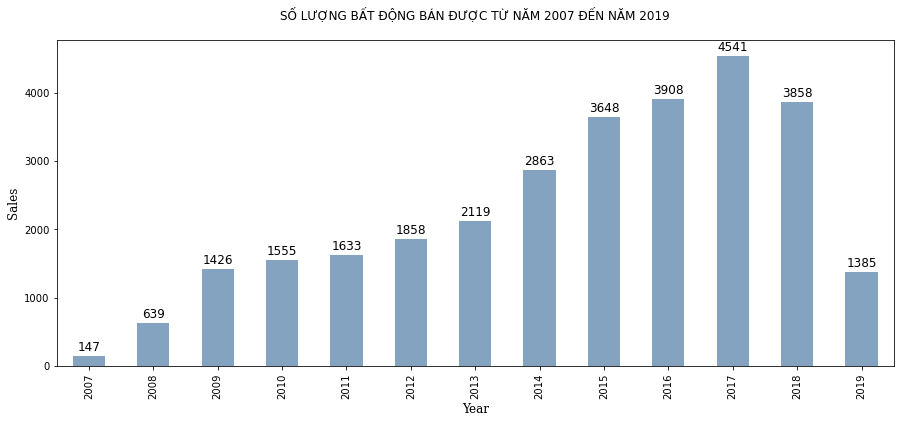

In [81]:
font1 = {'family':'serif','size':12}
c = (0.2, 0.4, 0.6, 0.6)
s = df.datesold.dt.year.value_counts().sort_index(ascending=True).plot.bar(color=c)


plt.title("SỐ LƯỢNG BẤT ĐỘNG BÁN ĐƯỢC TỪ NĂM 2007 ĐẾN NĂM 2019\n")
plt.xlabel("Year",fontdict = font1)
plt.ylabel("Sales",fontdict  = font1)
for i in s.patches:
    ypos = i.get_height() + 30
    xpos = i.get_x() + i.get_width()/2.
    lbl = i.get_height()
    plt.text(xpos, ypos,lbl , ha='center', va='bottom', fontsize=12)  

Nhận xét: Nhìn chung, doanh số bán hàng có chiều hướng tăng dần từ năm 2007 tới năm 2017. Số lượng nhà bán được đạt đỉnh vào năm 2017, là 4541 căn, và bắt đầu giảm dần tới 2019.

#### Giá bán nhà hàng năm thay đổi theo thời gian đối với tất cả các lần bán nhà

Text(0, 0.5, 'Giá bán (Trăm nghìn USD)')

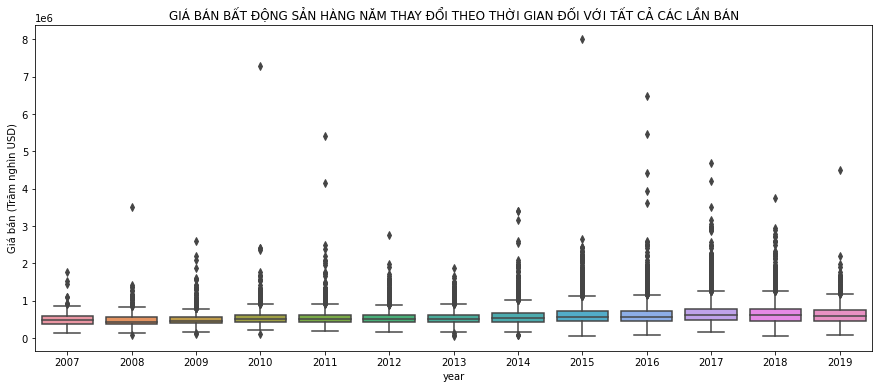

In [82]:
sns.boxplot(x = df['year'], y = df['price'])
plt.title("GIÁ BÁN BẤT ĐỘNG SẢN HÀNG NĂM THAY ĐỔI THEO THỜI GIAN ĐỐI VỚI TẤT CẢ CÁC LẦN BÁN")
plt.ylabel("Giá bán (Trăm nghìn USD)")

Nhận xét:
- Nhìn vào biểu đồ, có thể thấy sự phân bổ tổng thể của giá bán nhà hơi lệch về bên trái, khoảng từ 2007 - 2013 (tập trung nhiều hơn vào giá cao hơn) với doanh số bán nhà đắt đỏ hơn vì dữ liệu về giá bán tập trung ở mức thấp, dao động ở phạm vi hẹp. 
- Còn các năm trở về sau cho thấy sự phân bổ giá bán nhà kém hơn vì xu hướng tập trung của dữ liệu (trung vị) ở mức cao, độ dao động lớn (mặc dù sự phân bổ giá bán nhà trông khá giống nhau theo thời gian với sự chuyển động dần dần của các khu đất hộp)

#### Số lượng bán của từng loại phòng ngủ qua từng năm

In [7]:
df1=df.bedrooms.groupby(df['year']).value_counts(sort= False).reset_index(name='counts')
#Sắp xếp lại dữ liệu
df2=df1.pivot_table(index='year', values='counts', columns='bedrooms',fill_value=0)
df2.head()

bedrooms,0,1,2,3,4,5
year,,,,,,
2007,0,5,16,67,49,10
2008,1,15,57,293,243,30
2009,0,49,152,645,512,68
2010,0,50,151,689,573,92
2011,0,63,155,746,579,90


<AxesSubplot:title={'center':'SỐ LƯỢNG BÁN CỦA TỪNG LOẠI PHÒNG NGỦ QUA TỪNG NĂM'}, xlabel='year'>

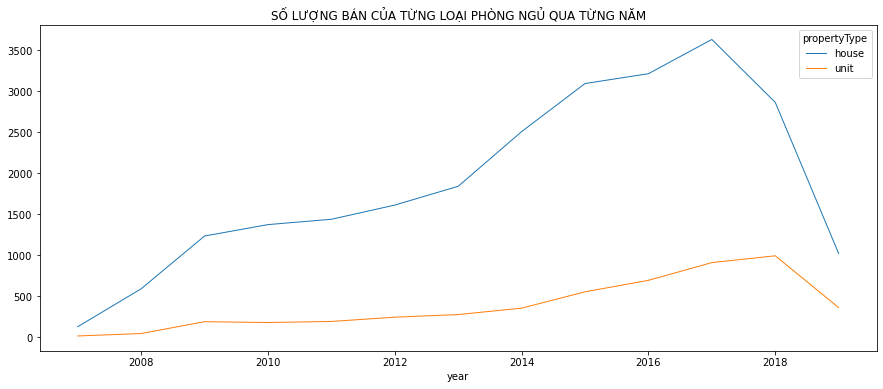

In [83]:
df2.plot(linewidth = '1',title='SỐ LƯỢNG BÁN CỦA TỪNG LOẠI PHÒNG NGỦ QUA TỪNG NĂM')

Nhận xét: Theo biểu đồ ta thấy loại 3 phòng ngủ được bán chạy nhất, tăng từ năm 2007 đến năm 2017, loại 0 phòng ngủ được bán ít nhất với 30 căn trong tất cả các năm.

### Theo từng vùng

#### Tổng giá trị bất động sản tất cả các năm theo từng vùng

type
Region 1: house    9443175487
Region 1: unit     1889190035
Region 3: house    6465443379
Region 3: unit      238189735
dtype: int64

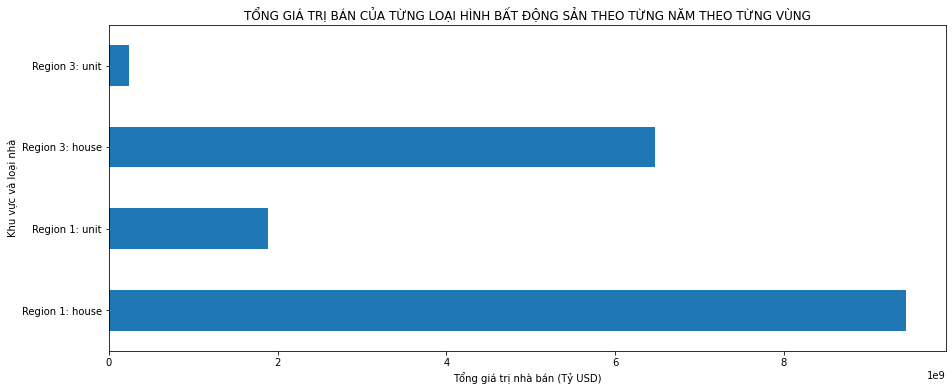

In [9]:
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 

df1 = df.drop(['datesold','bedrooms','postcode', 'region'], axis ='columns')
df1 = df1.groupby(['type','year']).sum().astype(int)
df2 = df1.pivot_table(index = 'year', values = 'price', columns = 'type', fill_value=0)

df2 = df2.sum(axis = 0)

# Trực quan hóa bằng biểu đồ cột ghép
df2.plot(kind = 'barh', title = 'TỔNG GIÁ TRỊ BÁN CỦA TỪNG LOẠI HÌNH BẤT ĐỘNG SẢN THEO TỪNG NĂM THEO TỪNG VÙNG')
plt.ylabel("Khu vực và loại nhà")
plt.xlabel("Tổng giá trị nhà bán (Tỷ USD)")
df2.head() 

Nhận xét: Biểu đồ trên thể hiện tổng giá trị nhà bán theo loại hình ở khu vực 1 và khu vực 3. Nhìn chung, loại hình nhà ở được ưa chuộng hơn so với loại hình căn hộ ở cả 2 khu vực. Loại hình này ở khu vực 1 cũng chiếm tổng giá trị được bán cao nhất, lên đến $6.465.443.379.

#### Giá bán trung bình của bất động sản ở từng khu vực biến động theo thời gian

In [10]:
# Xử lý dữ liệu để phù hợp cho việc trực quan hóa
df1 = df.drop(['datesold','bedrooms','propertyType','postcode'], axis ='columns')
df1['type'] = "Region " + df1['region'].astype(str)
df1=df1.groupby(['year','type']).mean().astype(int)
df2=df1.pivot_table(index='year', values='price', columns='type',fill_value=0)
df2.head()

type,Region 1,Region 3
year,,
2007,565565,466367
2008,527929,446889
2009,526406,459901
2010,600439,510026
2011,595923,528459


Text(0, 0.5, 'Giá bán (USD)')

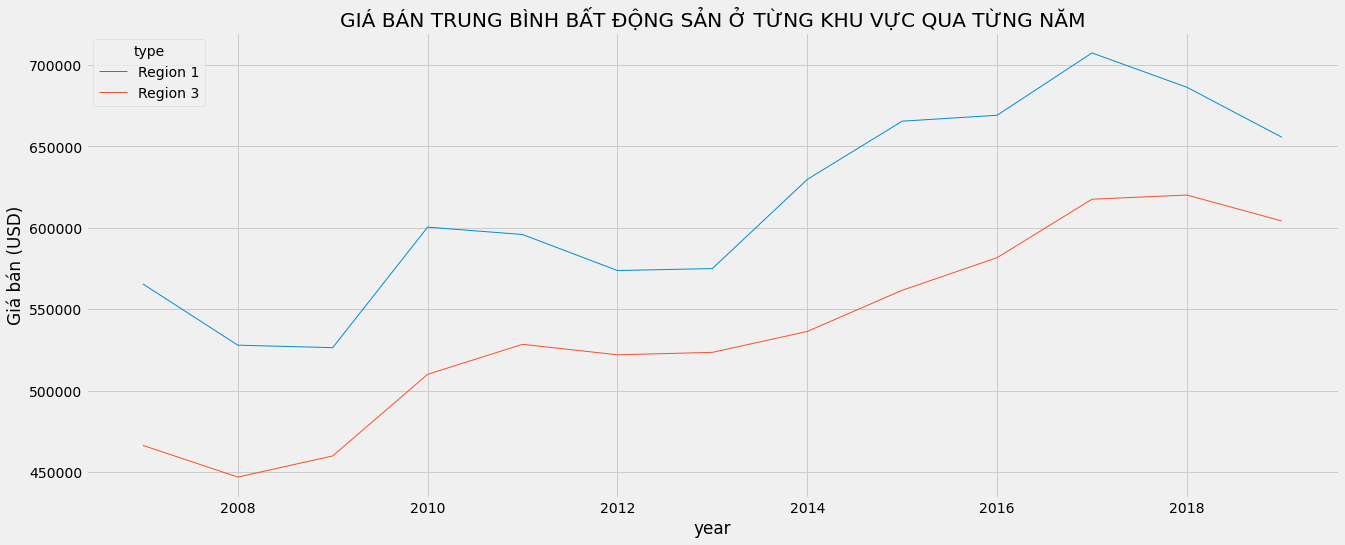

In [12]:
# Trực quan hóa dữ liệu bằng biểu đồ đường
df2.plot(linewidth = '1',title='GIÁ BÁN TRUNG BÌNH BẤT ĐỘNG SẢN Ở TỪNG KHU VỰC QUA TỪNG NĂM')
plt.ylabel("Giá bán (USD)")

Nhận xét:
Giá bất động trung bình ở cả 2 khu vực nhìn chung có sự biến động qua các năm và có xu hướng chung là tăng lên. Giá bất động sản ở khu vực 1 luôn cao hơn ở khu vực 3. Đặc điểm chung của sự biến động là từ năm 2017, giá nhà giảm thấp nhất vào khoảng 2008,2009 sau đó tăng lên và có sự giảm nhẹ trong 2 năm 2011, 2012. Sau đó liên tục tăng lên và chạm điểm ở năm 2017 sau đó bắt đầu giảm xuống. Với khu vực 1, giá bất động sản chạm mốc cao nhất vào năm 2017, thấp nhất vào năm 2009. Với khu vực 3, giá bất động sản chạm mốc cao nhất vào năm 2018, thấp nhất vào năm 2008.

### Loại hình bất động sản

#### Số lượng bán của từng loại loại hình bất động sản qua từng năm

In [11]:
df1=df.propertyType.groupby(df['year']).value_counts(sort= False).reset_index(name='counts')
df2=df1.pivot_table(index='year', values='counts', columns='propertyType',fill_value=0)
df2.head()

propertyType,house,unit
year,,
2007,130,17
2008,592,47
2009,1235,191
2010,1374,181
2011,1439,194


<AxesSubplot:title={'center':'SỐ LƯỢNG BÁN CỦA TỪNG LOẠI HÌNH BẤT ĐỘNG SẢN QUA TỪNG NĂM'}, xlabel='year'>

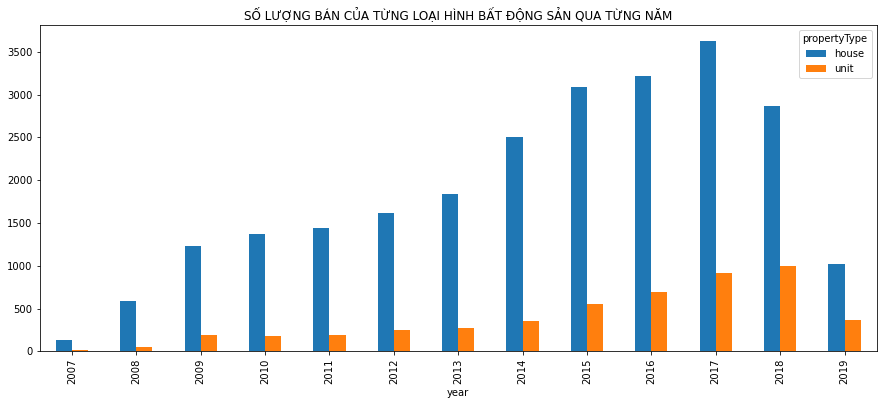

In [12]:
df2.plot(kind='bar', title='SỐ LƯỢNG BÁN CỦA TỪNG LOẠI HÌNH BẤT ĐỘNG SẢN QUA TỪNG NĂM' )

Nhận xét: Lượng nhà bán ra tăng liên tục từ năm 2007 tới năm 2017 nhưng lại sụt giảm vào năm 2018 và 2019. Còn số lượng bán căn hộ (unit) cũng tăng nhưng lượng tăng thấp hơn so với lượng bán nhà.

###  Loại hình bất động sản theo từng khu vực


#### Số lượng bán của từng loại loại hình bất động sản theo khu vực qua từng năm

Text(0, 0.5, '\n Count')

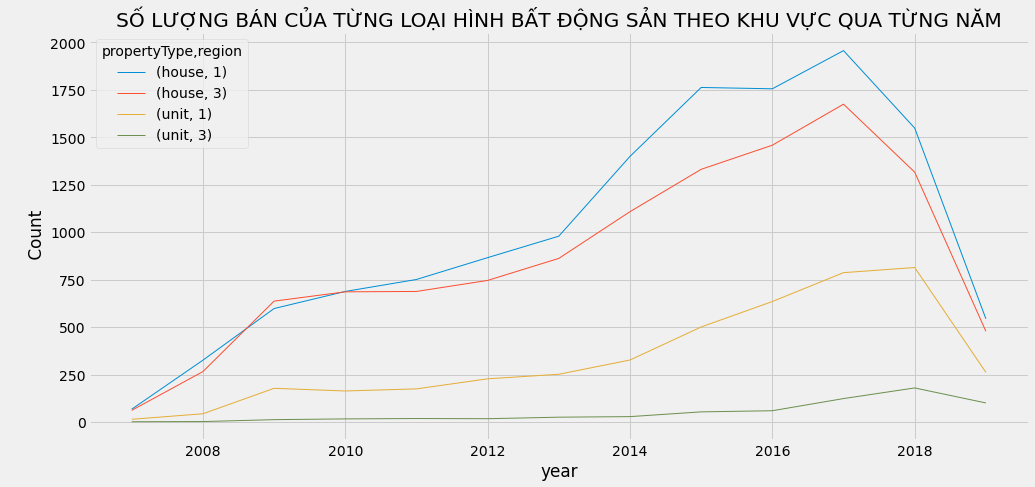

In [15]:
#Số lượng bán của từng loại propertyType theo region qua từng năm

df1 = df.pivot_table(columns=['propertyType','region'],index=['year'], aggfunc='size')
df1.head(5)
df1.plot(linewidth = '1', figsize=(15,7))
plt.title("SỐ LƯỢNG BÁN CỦA TỪNG LOẠI HÌNH BẤT ĐỘNG SẢN THEO KHU VỰC QUA TỪNG NĂM")
plt.ylabel("\n Count")

Nhận xét: Theo biểu đồ ta thấy số lượng house, unit ở khu vực 1 là được bán nhiều nhất, tăng dần theo từng năm đỉnh điểm nhất là khoảng thời gian từ 2014 - 2018.

#### Tổng giá trị bất động sản theo từng vùng theo từng năm

Region,Region 1,Region 3
year,,
2007,46941950,29847500
2008,195334000,120213250
2009,408491221,298936018
2010,511574539,358548741
2011,551824810,373620965


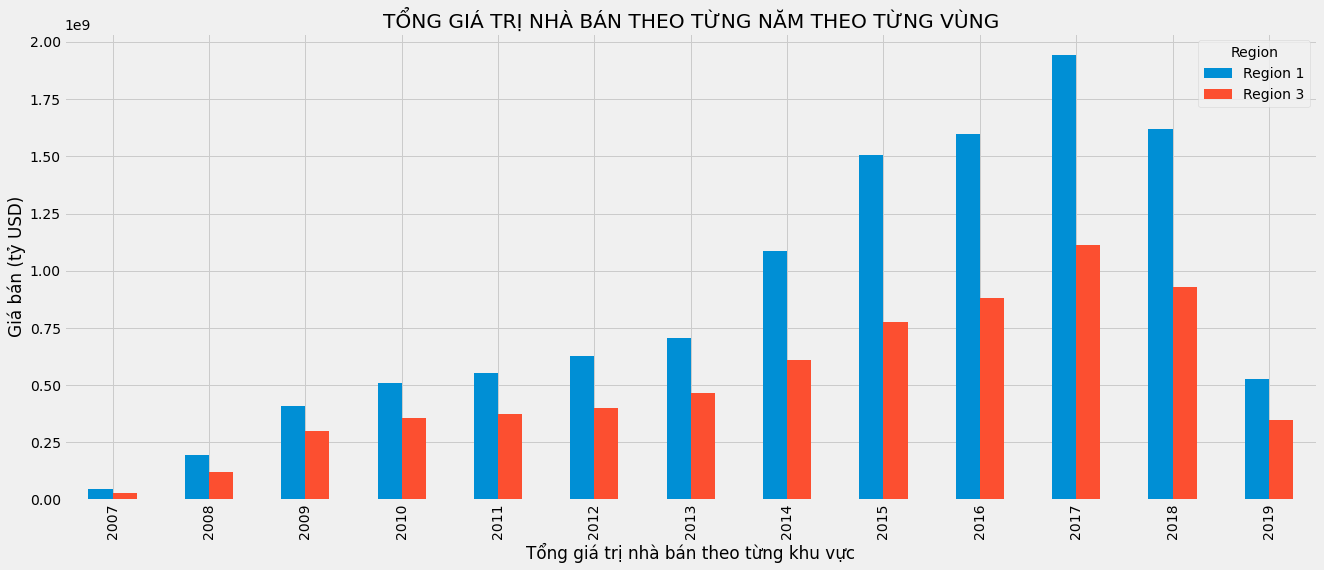

In [16]:
# THỐNG KÊ TỔNG GIÁ TRỊ NHÀ BÁN THEO TỪNG NĂM (TỪ NĂM 2007 ĐẾN NĂM 2019) THEO TỪNG VÙNG (REGION 1 VÀ REGION 3)

# Xử lý dữ liệu để phù hợp cho việc trực quan hóa
df1 = df.drop(['datesold','bedrooms','propertyType','postcode'], axis ='columns')
df1['Region'] = "Region " + df1['region'].astype(str)
df1 = df1.groupby(['year','Region']).sum().astype(int)
df2 = df1.pivot_table(index = 'year', values = 'price', columns = 'Region', fill_value=0)
df2.head(13)

# Trực quan hóa bằng biểu đồ cột ghép
df2.plot(kind = 'bar', title = 'TỔNG GIÁ TRỊ NHÀ BÁN THEO TỪNG NĂM THEO TỪNG VÙNG')
plt.ylabel("Giá bán (tỷ USD)")
plt.xlabel("Tổng giá trị nhà bán theo từng khu vực")
df2.head()

Nhận xét: 
Biểu đồ trên thể hiện sự phân bố tổng giá trị nhà bán theo từng năm của hai khu vực 1 và 3, ta có thể thấy tổng giá trị nhà bán của khu vực 1 luôn cao hơn so với khu vực 3 ở tất cả các năm. Điều này cho thấy thị trường nhà đất ở khu vực 1 năng động hơn so với khu vực 3. 
Tổng giá trị nhà bán của cả 2 khu vực có xu hướng tăng dần trong một thập kỷ (từ năm 2007 đến năm 2017), cụ thể là tổng giá trị đã đạt mức cao nhất vào năm 2017 với 1.940.566.595 ở khu vực 1 và 1.110.442.989 ở khu vực 3.
Năm 2018, tổng giá trị nhà bán có xu hướng giảm so với năm trước ở cả 2 khu vuc, cụ thể là ở khu vực 1, tổng giá trị giảm từ 1.940.566.595 xuống 1.621.215.228 (giảm 319.351.367) ở khu vực 3, tổng giá trị giảm từ 1.110.442.989 xuống 927.769.395 (giảm 182.673.594). 
Năm 2019, tổng giá trị nhà bán tiếp tục có xu hướng giảm mạnh, ở khu vực 1, tổng giá trị giảm từ $1.621.215.228 xuống 528.492.633 (giảm 1.092.722.595). Ở khu vực 2, tổng giá trị giảm từ 927.769.395 xuống 349.852.510 (giảm 577.916.885).

#### Giá bán trung bình bất động sản ở từng khu vực qua từng năm theo loại hình bất động sản

In [17]:
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 
df1 = df.drop(['datesold','bedrooms','propertyType'], axis ='columns')
df1=df1.groupby(['year','type']).mean().astype(int)
df2=df1.pivot_table(index='year', values='price', columns='type',fill_value=0)
df2.head()

type,Region 1: house,Region 1: unit,Region 3: house,Region 3: unit
year,,,,
2007,605544,384330,467911,418500
2008,554522,330904,448565,298316
2009,570122,379540,461976,358230
2010,636244,450232,512476,411176
2011,637663,416796,531744,409526


Text(0, 0.5, 'Giá bán (USD)')

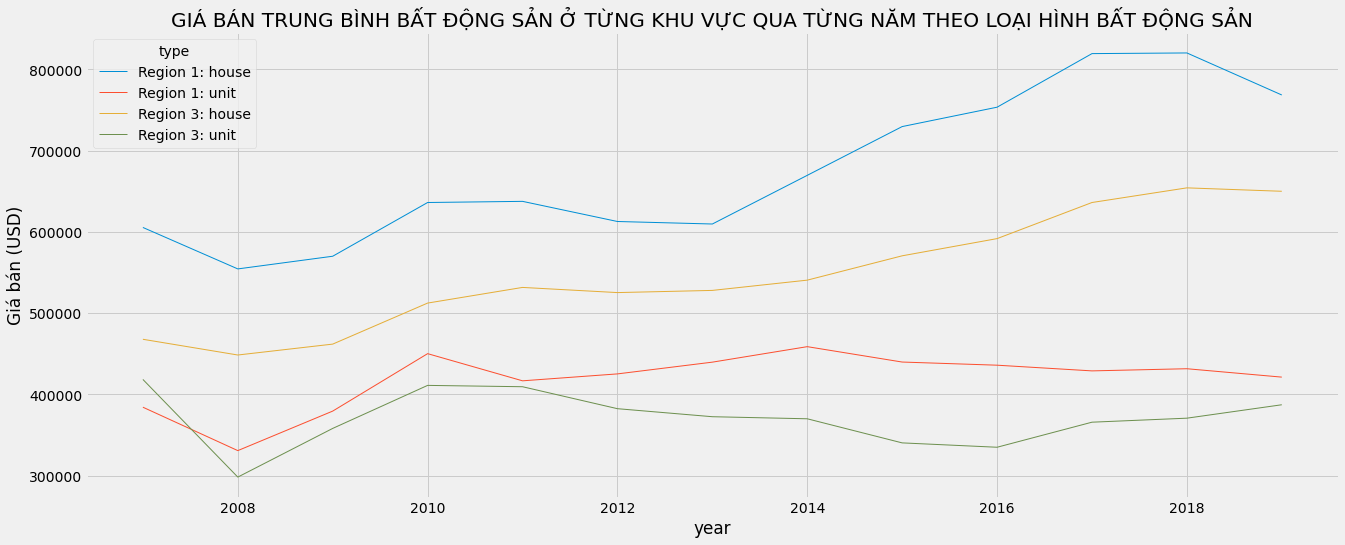

In [18]:
# Trực quan hóa dữ liệu bằng biểu đồ đường
df2.plot(linewidth = '1',title='GIÁ BÁN TRUNG BÌNH BẤT ĐỘNG SẢN Ở TỪNG KHU VỰC QUA TỪNG NĂM THEO LOẠI HÌNH BẤT ĐỘNG SẢN')
plt.ylabel("Giá bán (USD)")

Nhận xét:
Ta có thể thấy rõ ràng, giá của nhà ở thì luôn cao hơn đáng kể so với giá của căn hộ và giá ở khu vực 1 luôn cao hơn ở khu vực 3 ngoại trừ vào năm 2007, giá của căn hộ ở khu vực 3 lại cao hơn.
Giá cả của căn hộ luôn giao động trong khoảng từ 300000 đô đến hơn 450000 đô. Ngoại trừ vào khoảng thời gian từ 2007 đến 2010 có sự biến động mạnh thì nhìn chung giá của căn hộ có sự ổn định hơn, không thay đổi quá nhiều.
Giá cả của nhà ở thì giao động trong khoảng từ 450000 đô đến hơn 800000 đô. Giá của nhà ở nhìn chung thường tăng qua các năm và giá ở năm 2007 so với năm 2019 thì có sẽ thấp hơn rõ ràng. 


### Loại hình bất động sản theo phòng ngủ của từng khu vực


#### Số lượng bán bất động sản theo từng loại phòng ngủ của mỗi loại loại hình

In [13]:
df_solution = df.pivot_table(index=['propertyType','bedrooms'], aggfunc='size').unstack()
df_solution

bedrooms,0,1,2,3,4,5
propertyType,,,,,,
house,19,95,806,11281,10404,1947
unit,11,1532,2792,652,38,3


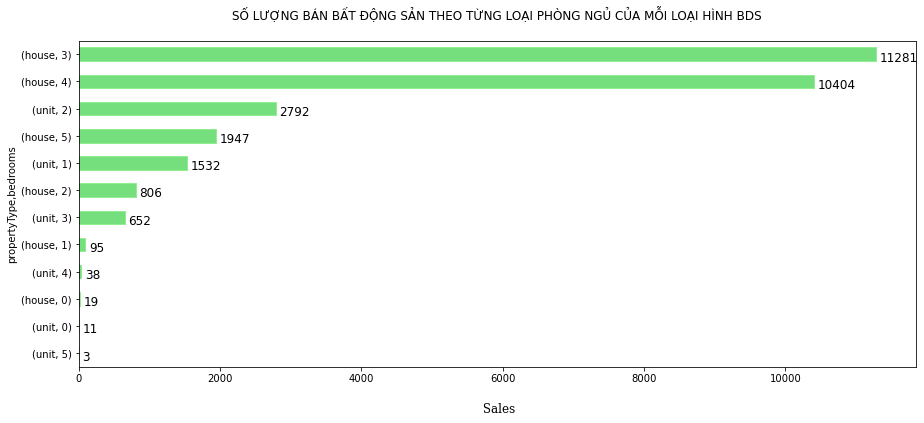

In [14]:
s = df.value_counts(['propertyType','bedrooms']).sort_values(ascending=True).plot.barh(color='#76DF7D',edgecolor='#90EE90')

plt.title("SỐ LƯỢNG BÁN BẤT ĐỘNG SẢN THEO TỪNG LOẠI PHÒNG NGỦ CỦA MỖI LOẠI HÌNH BDS\n")
plt.xlabel("\n Sales",fontdict = font1)

for i in s.patches:
    xpos = i.get_width() + 50
    ypos = i.get_y()
    lbl = i.get_width()
    plt.text(xpos, ypos, lbl, fontsize=12)

Nhận xét: Theo biểu đồ, số lượng loại house với 3 phòng ngủ là bán chạy nhất từ trước tới nay, đạt 11,281 căn và thấp nhất là loại unit 5 phòng ngủ, chỉ đạt 3 căn. Phần lớn doanh số đến từ loại house từ 3-5 phòng ngủ và loại unit với 2 phòng ngủ.

#### Giá bán trung bình bất động sản tất cả các năm ở từng khu vực theo loại hình bất động sản và phòng ngủ

In [22]:
# GIÁ BÁN TRUNG BÌNH BẤT ĐỘNG SẢN TẤT CẢ CÁC NĂM Ở TỪNG KHU VỰC THEO LOẠI HÌNH VÀ PHÒNG NGỦ
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 
df1 = df.drop(['datesold','propertyType'], axis ='columns')
df1=df1.groupby(['bedrooms','type']).mean().astype(int)
df2=df1.pivot_table(index='type', values='price', columns='bedrooms',fill_value=0)
df2.head()

bedrooms,0,1,2,3,4,5
type,,,,,,
Region 1: house,730750,349605,522611,615281,796374,1025645
Region 1: unit,308954,340701,438502,608830,708454,1146333
Region 3: house,528000,347300,393046,466986,641538,790644
Region 3: unit,0,289901,370916,466193,550000,0


Text(0.5, 0, 'Loại hình bất động sản theo khu vực')

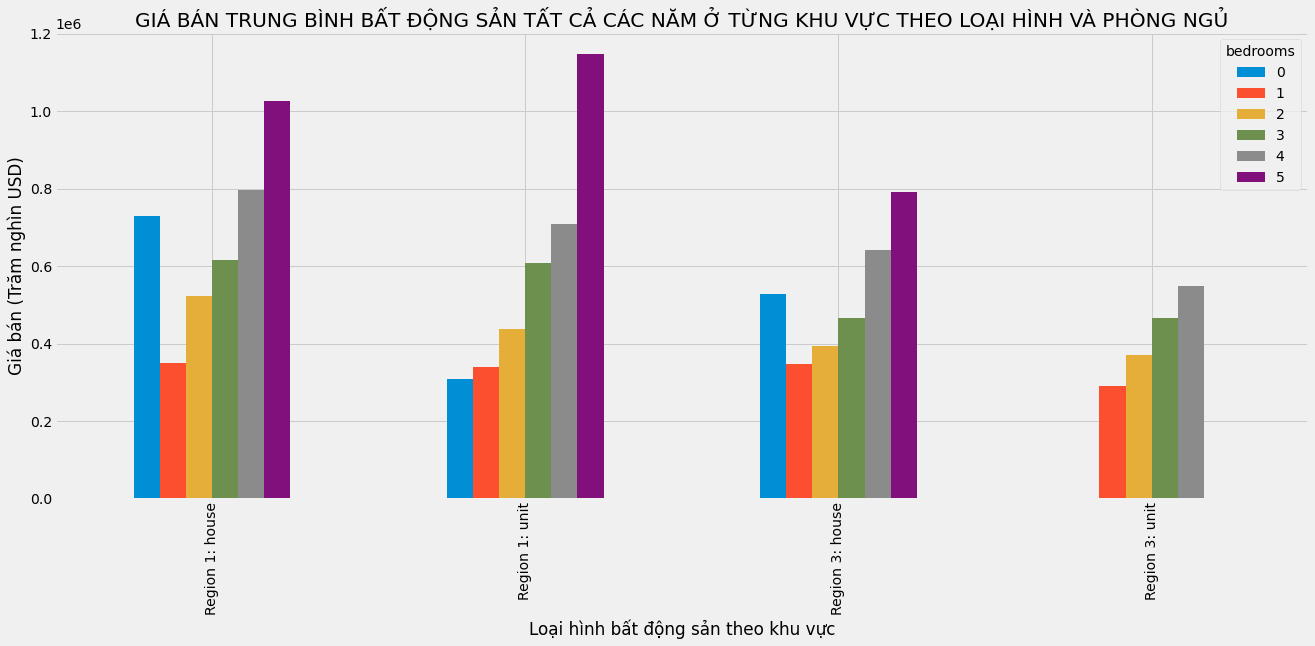

In [23]:
df2.plot(figsize=(20,8),kind='bar', title='GIÁ BÁN TRUNG BÌNH BẤT ĐỘNG SẢN TẤT CẢ CÁC NĂM Ở TỪNG KHU VỰC THEO LOẠI HÌNH VÀ PHÒNG NGỦ')
plt.ylabel("Giá bán (Trăm nghìn USD)")
plt.xlabel("Loại hình bất động sản theo khu vực")

 Nhận xét: 
- Nhìn vào biểu đồ, giá của nhà ở theo phòng ngủ có xu hướng cao hơn so với giá của căn hộ theo phòng ngủ và giá ở khu vực 1 luôn cao hơn ở khu vực 3.
- Giá cả của căn hộ ở khu vực 1 và 3 đều có xu hướng tăng theo số lượng phòng tăng dần. Cụ thể giá ở căn hộ không có phòng ngủ sẽ thấp nhất và giá ở căn hộ có 5 phòng ngủ sẽ cao nhất.
  ->Giá cả căn hộ tỷ lệ thuận với số lượng phòng ngủ trong căn hộ đó
- Giá cả nhà ở của khu vực 1 và 3 có sự biến động nhẹ, đặc biệt là đối với nhà không có phòng ngủ. Giá nhà ở có 1 đến 5 phòng ngủ sẽ có chiều hướng tăng dần theo số lượng phòng ngủ, tương tự như giá cả của căn hộ.
Tuy nhiên, giá nhà ở không có phòng ngủ sẽ nằm ở giữa giá của nhà có 3 và 4 phòng ngủ. Lí giải điều này có thể là do những người có điều kiện và sống một mình thường sẽ mua những ngôi nhà ở vị trí gần khu trung tâm thành phố với giá thuê mặt bằng cao để tiện cho việc sinh hoạt và làm việc hơn.

## Predictive Analysis (Time-series Forecasting)

In [48]:
# time-series prediction packages

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX # sarimax algorithm for actual predictions

import warnings
warnings.filterwarnings("ignore")  #Specify to ignore warning messages

In [49]:
df = pd.read_csv('raw_sales.csv')

### Sales Forecast 

#### Data Preprosessing

In [50]:
df['datesold'] = pd.to_datetime(df['datesold'])
df['month'] = df['datesold'].dt.strftime('%Y-%m')

ts=df['month'].value_counts().sort_index(ascending=True)
ts #dang series

2007-02      2
2007-03      3
2007-04      3
2007-05      2
2007-06      6
          ... 
2019-03    236
2019-04    212
2019-05    220
2019-06    126
2019-07    250
Name: month, Length: 150, dtype: int64

In [51]:
ts = pd.DataFrame(ts).reset_index()
ts.columns = ['Month', 'Sales']
ts['Month'] = pd.to_datetime(ts['Month'], format = '%Y-%m-%d')

In [52]:
ts.set_index(['Month'], inplace = True)
ts

,Sales
Month,
2007-02-01,2
2007-03-01,3
2007-04-01,3
2007-05-01,2
2007-06-01,6
...,...
2019-03-01,236
2019-04-01,212
2019-05-01,220


#### Check Stationarity

<AxesSubplot:xlabel='Month'>

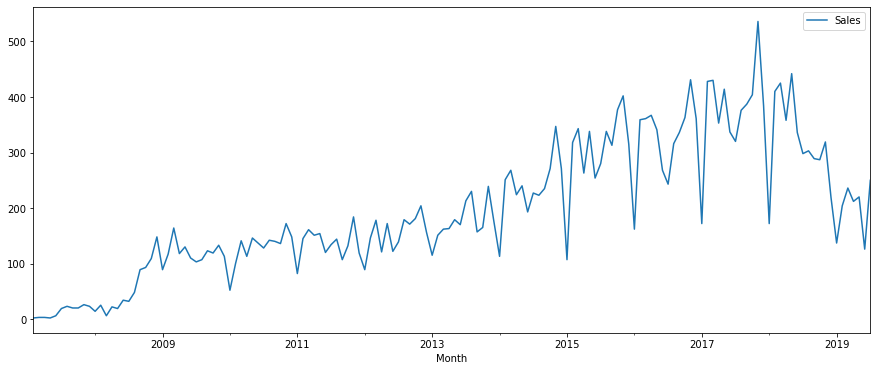

In [20]:
ts.plot()

In [ ]:
#Cấu trúc của mô hình SARIMA 
Seasonal Autoregressive Integrated Moving Average SARIMA(p,d,q)(P,D,Q)m

p: the lag order (number of lag observations included)
d: the degree of differencing needed for stationarity (number of times the data is differenced)
q: the order of the moving average
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

#### Build SARIMAX Model with exogenous variable

In [53]:
# multiplicative seasonal component
result_mul = seasonal_decompose(ts['Sales'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
ts['month'] = ts.index.month
new_ts = pd.merge(ts, seasonal_index, how='left', on='month')
new_ts.columns = ['value', 'month', 'seasonal_index']
new_ts.index = ts.index  # reassign the index.
new_ts

,value,month,seasonal_index
Month,,,
2007-02-01,2,2,1.054283
2007-03-01,3,3,1.136708
2007-04-01,3,4,0.992926
2007-05-01,2,5,1.171618
2007-06-01,6,6,0.865870
...,...,...,...
2019-03-01,236,3,1.136708
2019-04-01,212,4,0.992926
2019-05-01,220,5,1.171618


In [54]:
import pmdarima as pm
sxmodel = pm.auto_arima(new_ts[['value']], exogenous=new_ts[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal= True,  
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1403.359, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1554.637, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.543, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1473.507, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1563.727, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1420.090, Time=0.20 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1405.346, Time=0.79 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1405.349, Time=1.88 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1406.708, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1406.832, Time=2.84 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1415.356, Time=0.53 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1405.204, Time=1.07 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1405.006, Time=1.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1553.048, Time=0.51 sec
 ARIMA(0,0,2)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -695.856
Date:                            Mon, 30 Aug 2021   AIC                           1401.711
Time:                                    17:23:50   BIC                           1416.347
Sample:                                02-01-2007   HQIC                          1407.659
                                     - 07-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
seasonal_index    -0.0024   6623.710  -3.62e-07      1.000    -1.3e+04     1.3e+04
ar.L1              0.9698      0.021     45.353      0.000       0.928       1.012
ma.L1             -0.4780      0.074     -6.446      0.000      -0.623      -0.333
ma.S.L12          -0.4644      0.072     -6.487      0.000      -0.605      -0.324
sigma2          1364.3535    145.155      9.399      0.000    1079.855    1648.852
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 8.46
Prob(Q):                              0.79   Prob(JB):                         0.01
Heteroskedasticity (H):               4.38   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

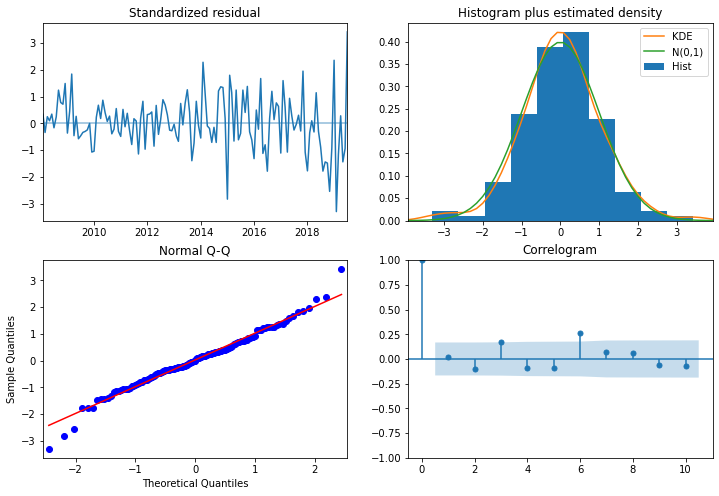

In [25]:
sxmodel.plot_diagnostics(figsize=(12,8))
plt.show()

Sai số dư dường như dao động xung quanh giá trị trung bình bằng 0 và có phương sai đồng nhất.
Histogram plus estimated density plot: Đường KDE theo sát với đường N (0,1). Đây là một dấu hiệu tốt cho thấy phần dư được phân phối bình thường.
Biểu đồ Q-Q: phân phối có thứ tự của phần dư (chấm xanh lam) tuân theo xu hướng tuyến tính của các mẫu được lấy từ phân phối chuẩn chuẩn với N (0, 1) 

#### Predict the next 24 months

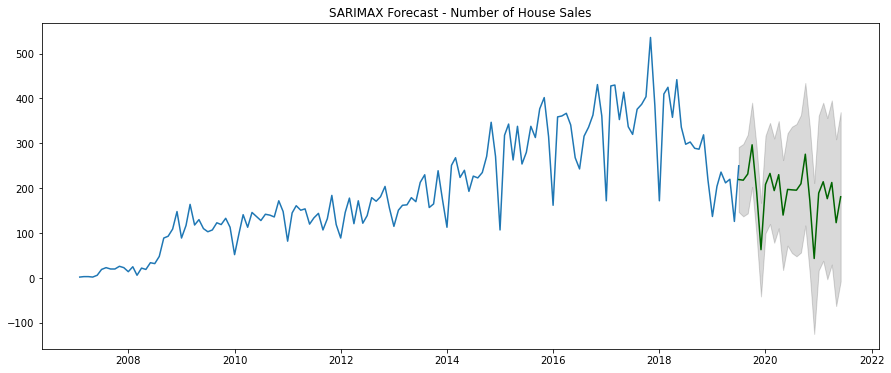

In [27]:
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.values, 1).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(new_ts.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(new_ts['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast - Number of House Sales")
plt.show()

<AxesSubplot:>

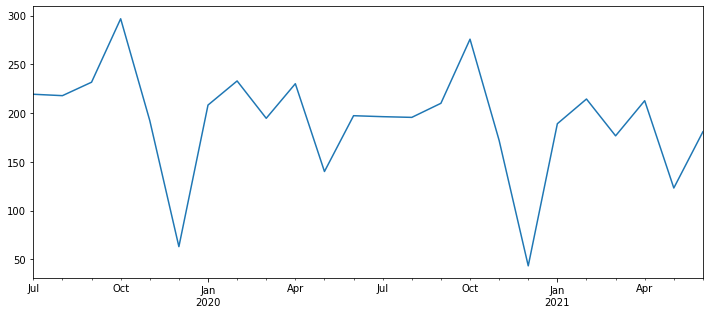

In [70]:
fitted_series.plot(figsize=(12,5))

Biểu đồ dự đoán mang xu hướng và tính mùa của bộ dữ liệu 3 năm gần đây. Nhìn chung, số lượng bất động sản bán trong tương lai được dự đoán có xu hướng tăng so với 3 năm gần đây, đạt dỉnh vào các tháng 10 năm 2019, 2020 và giảm mạnh vào các tháng 12. Sau đó tăng mạnh và duy trì ổn định trong các tháng giữa năm.

### Price Forecasting

#### Data Preprocessing

In [55]:
# Xử lý dữ liệu để phù hợp cho việc trực quan hóa
df = df.drop(['bedrooms','propertyType','postcode'], axis ='columns')
tp= df.groupby(df['month']).mean().astype(int)

In [56]:
tp.reset_index(drop=False, inplace=True)
tp

,month,price
0,2007-02,407500
1,2007-03,339333
2,2007-04,798000
3,2007-05,339500
4,2007-06,520333
...,...,...
145,2019-03,651666
146,2019-04,655325
147,2019-05,641491
148,2019-06,703275


In [57]:
tp['month'] = pd.to_datetime(tp.month)
tp = tp.set_index(tp.month)

tp.drop('month', axis = 1, inplace = True)
tp

,price
month,
2007-02-01,407500
2007-03-01,339333
2007-04-01,798000
2007-05-01,339500
2007-06-01,520333
...,...
2019-03-01,651666
2019-04-01,655325
2019-05-01,641491


#### Check Stationarity

<AxesSubplot:xlabel='month'>

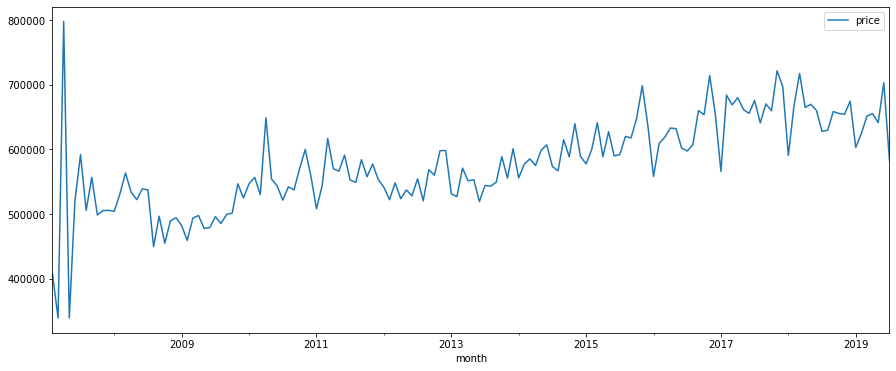

In [32]:
tp.plot()

 Xu hướng của chuỗi có xu hướng lên xuống 🡺 Chuỗi không dừng

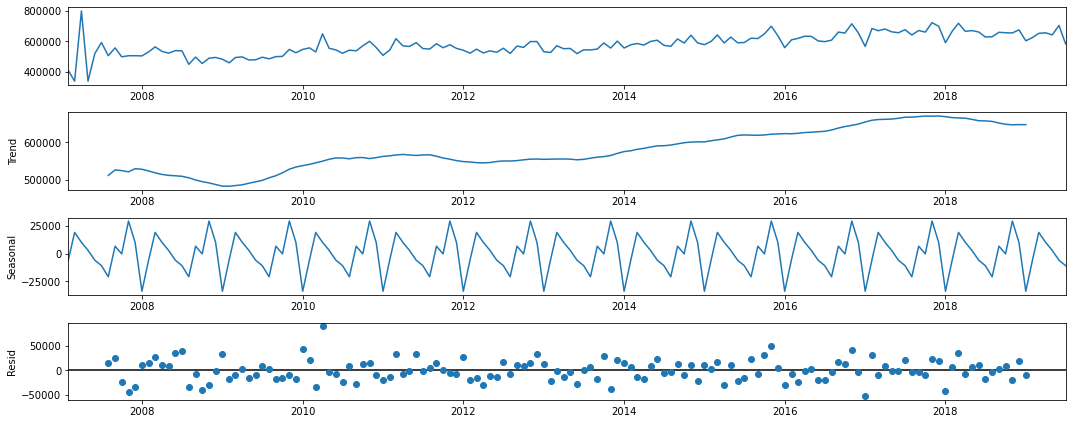

In [33]:
#Sử dụng phương pháp phân tích (decomposition method)
result = seasonal_decompose(tp, model='ad')
result.plot();

Biểu đồ cho thấy dữ liệu có cả xu hướng và tính thời vụ. Điều đó có nghĩa là nó not stationary.

In [34]:
#Kiểm tra thống kê bằng Dickey-Fuller test
result = adfuller(tp)
print('ADF result:', result[0])
print('p-value = ', result[1])
print('#Lags = ', result[2])
critical_values = result[4]
print('Number of observation used:', result[3])
for key, value, in critical_values.items():
  print("critical values (%s): %.3f" % (key, value))

ADF result: -0.6602114320589664
p-value =  0.8567883077562706
#Lags =  13
Number of observation used: 136
critical values (1%): -3.479
critical values (5%): -2.883
critical values (10%): -2.578


p-value > 0.05 và trị tuyệt đối của ADF statistic còn lớn hơn các Critical value 1%, 5% và 10% 
🡺 Chuỗi chưa dừng. Do đó, ta tiến hành biến đổi làm cho chuỗi có tính dừng

#### Make series stationary & determine the d value

In [35]:
#lấy sai phân của chuỗi
tp_diff = tp.diff()
tp_diff.dropna(inplace = True)
result = adfuller(tp_diff)
print('ADF result', result[0])
print('p-value = ', result[1])
print('#Lag = ', result[2])
critical_values = result[4]
print('Number of observation used:', result[3])
for key, value, in critical_values.items():
  print("critical values (%s): %.3f" % (key, value))

ADF result -5.303755431080508
p-value =  5.378421428851641e-06
#Lag =  10
Number of observation used: 138
critical values (1%): -3.479
critical values (5%): -2.883
critical values (10%): -2.578


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

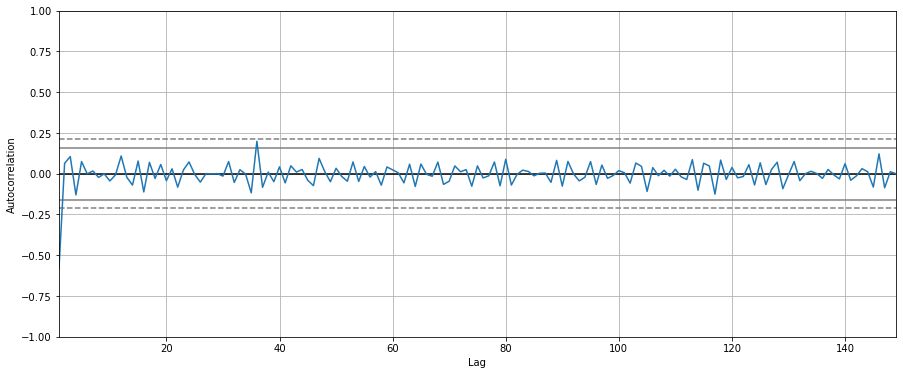

In [36]:
pd.plotting.autocorrelation_plot(tp_diff)

Chuỗi đã dừng. Như vậy d = 1

#### Build ARIMA model

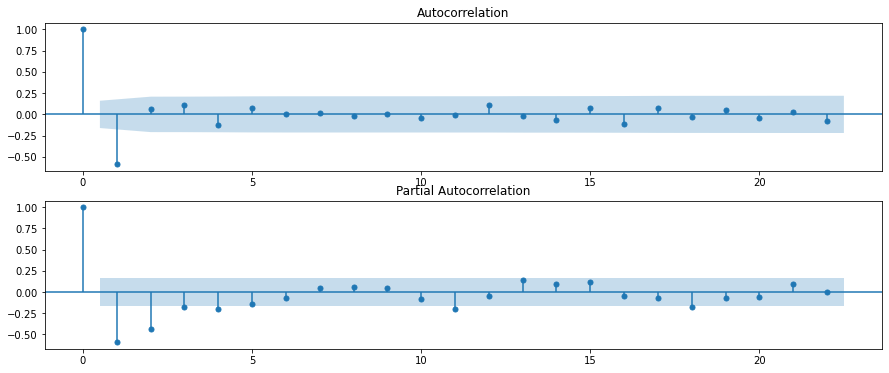

In [37]:
####  Finding the order of differencing. 
plt.subplot(211)
plot_acf(tp_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(tp_diff, ax=plt.gca())
plt.show()

#Dựa vào biểu đồ ACF để chọn bậc q cho MA
Sau một độ trễ 1 lag nằm ngoài khoảng tin cậy, các giá trị giảm dần về 0
và năm trong dãy màu xanh (nằm trong độ tin cậy 95%), nên ta có thể chọn q thuộc (0,1)

#Dựa vào biểu đồ của PACF để xác định p cho AR
Ta thấy rằng sau sau một độ trễ 2 lags nằm ngoài khoảng tin cậy, các giá trị giảm dần về 0 và nằm trong dãy màu xanh (nằm trong độ tin cậy 95%). Nên ta có thể chọn p thuộc (0,2)

In [ ]:
# Finding model parameters by grid search

In [58]:
import itertools
p = d = q = range(3) #0,1,2
pdq = list(itertools.product(p, d, q))     

In [59]:
AIC_df = pd.DataFrame({}, columns = ['param', 'AIC'])

for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tp, order = param, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            #print('ARIMA{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[param, results.aic]], columns = ['param', 'AIC'])
            AIC_df = AIC_df.append(temp, ignore_index = True)
            del temp
        except:
            continue

In [60]:
min_aic = AIC_df.sort_values(by = 'AIC').iloc[0]    #Row with minimum AIC value
model = sm.tsa.statespace.SARIMAX(tp, order = min_aic.param, enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  150
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1725.486
Date:                Mon, 30 Aug 2021   AIC                           3458.972
Time:                        17:24:14   BIC                           3470.906
Sample:                    02-01-2007   HQIC                          3463.821
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4191      0.050      8.437      0.000       0.322       0.516
ma.L1         -1.1894      0.085    -14.071      0.000      -1.355      -1.024
ma.L2          0.3348      0.083      4.047      0.0

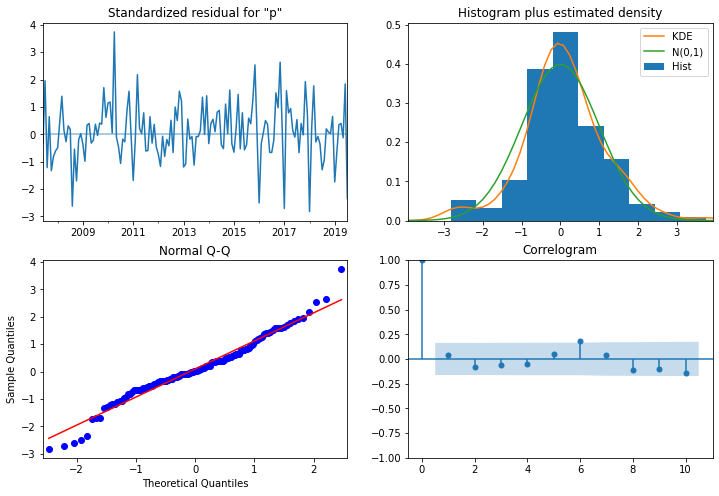

In [42]:
results.plot_diagnostics(figsize=(12,8))
plt.show()

#### Forecasting price of next 24 months

In [61]:
pred_uc = results.get_forecast(steps=24)    
pred_ci = pred_uc.conf_int()   
pred_ci

,lower price,upper price
2019-08-01,579203.730825,704063.476128
2019-09-01,576974.139256,705086.017789
2019-10-01,574967.901493,706586.411430
2019-11-01,573083.340312,708258.986118
2019-12-01,571276.655113,709976.833134
2020-01-01,569527.401791,711688.856617
2020-02-01,567825.161804,713375.494520
2020-03-01,566163.988704,715030.129181
2020-04-01,564540.013889,716651.363901
2020-05-01,562950.394760,718239.834725


In [62]:
#Take exponential function
pred_uc = pred_uc.predicted_mean
pred_uc

2019-08-01    641633.603476
2019-09-01    641030.078522
2019-10-01    640777.156461
2019-11-01    640671.163215
2019-12-01    640626.744123
2020-01-01    640608.129204
2020-02-01    640600.328162
2020-03-01    640597.058942
2020-04-01    640595.688895
2020-05-01    640595.114742
2020-06-01    640594.874130
2020-07-01    640594.773295
2020-08-01    640594.731038
2020-09-01    640594.713329
2020-10-01    640594.705907
2020-11-01    640594.702797
2020-12-01    640594.701494
2021-01-01    640594.700948
2021-02-01    640594.700719
2021-03-01    640594.700623
2021-04-01    640594.700583
2021-05-01    640594.700566
2021-06-01    640594.700559
2021-07-01    640594.700556
Freq: MS, Name: predicted_mean, dtype: float64

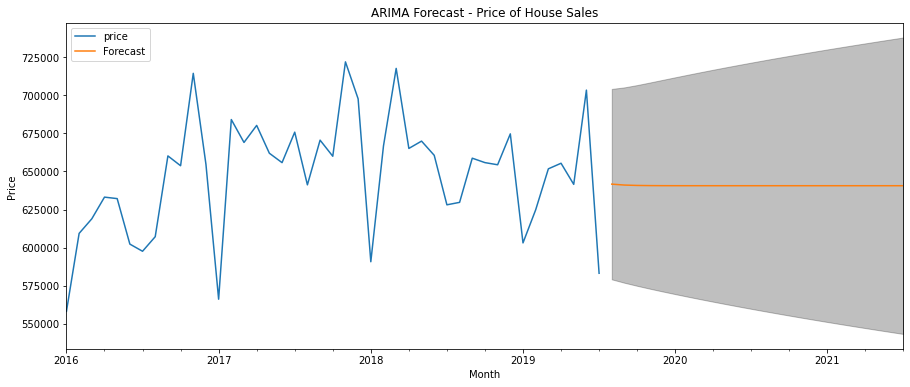

In [84]:
#Plot original data prediction
ax = tp['2016':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Price')
plt.legend(loc = 'upper left')
plt.title("ARIMA Forecast - Price of House Sales")
plt.show()

<AxesSubplot:>

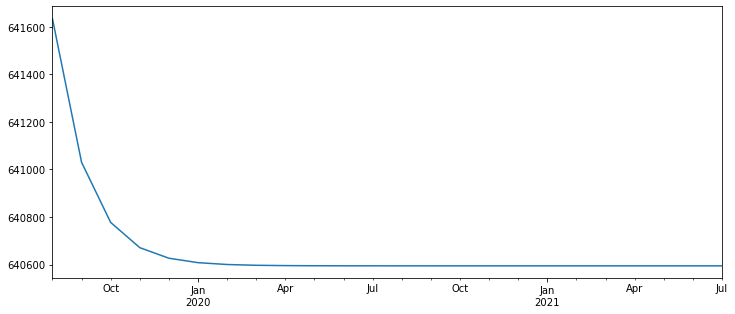

In [69]:
pred_uc.plot(figsize=(12,5))